Pandas 是基于 NumPy 的一种数据处理工具，该工具为了解决数据分析任务而创建。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的函数和方法。  

Pandas 的数据结构：Pandas 主要有 Series（一维数组），DataFrame（二维数组），Panel（三维数组），Panel4D（四维数组），PanelND（更多维数组）等数据结构。其中 Series 和 DataFrame 应用的最为广泛。
- Series 是一维带标签的数组，它可以包含任何数据类型。包括整数，字符串，浮点数，Python 对象等。Series 可以通过标签来定位。
- DataFrame 是二维的带标签的数据结构。我们可以通过标签来定位数据。这是 NumPy 所没有的。


### 实验知识点
本次实验涉及的知识点主要有：
- 创建Series
- Series基本操作
- 创建DataFrame
- DataFrame基本操作
- DataFrame文件操作
- 透视表

### 实验环境
- Python 3.6
- NumPy
- Pandas



## 基础部分

1、导入Pandas模块

In [1]:
import pandas as pd

2、查看 Pandas 版本信息

In [2]:
pd.__version__

'0.24.2'

### 创建 Series 数据类型

Pandas 中，Series 可以被看作由 1 列数据组成的数据集。

创建 Series 语法：`s = pd.Series(data, index=index)`，可以通过多种方式进行创建，以下介绍了 3 个常用方法。

3、从列表创建 Series，命名为s1

前面的 `0,1,2,3,4` 为当前 Series 的索引，后面的 `0,1,2,3,4` 为 Series 的值。

In [3]:
arr = [0,1,2,3,4]
s1 = pd.Series(arr)  # 如果不指定索引，则默认从0开始
s1

0    0
1    1
2    2
3    3
4    4
dtype: int64

4、从 Ndarray 创建 Series，命名为s2

In [4]:
import numpy as np

In [8]:
n = np.array([0,1,2,3,4])
index = ['0','1','2','3','4']
s2 = pd.Series(n,index=index)
s2

0    0
1    1
2    2
3    3
4    4
dtype: int32

5、从字典创建 Series,命名为s3

In [9]:
d = {'0':0, '1':1, '2':2, '3':3, '4':4}
s3 = pd.Series(d)
s3

0    0
1    1
2    2
3    3
4    4
dtype: int64

### Series 基本操作

6、修改 Series s1索引为A、B、C、D、E

In [10]:
s1.index=['A','B','C','D','E']
s1

A    0
B    1
C    2
D    3
E    4
dtype: int64

7、Series 纵向拼接s3与s1,命名为s4

In [11]:
s4 = s3.append(s1)
s4

0    0
1    1
2    2
3    3
4    4
A    0
B    1
C    2
D    3
E    4
dtype: int64

8、Series 按指定索引删除元素，s4删除E索引元素

In [12]:
s4 = s4.drop('E')
s4

0    0
1    1
2    2
3    3
4    4
A    0
B    1
C    2
D    3
dtype: int64

9、Series 修改指定索引元素，s4的A索引元素改为6

In [13]:
s4['A'] = 6
s4

0    0
1    1
2    2
3    3
4    4
A    6
B    1
C    2
D    3
dtype: int64

10、Series 按指定索引查找元素，查找s4的B索引元素

In [14]:
s4['B']

1

11、Series 切片操作

例如对s4前 3 个数据访问

In [15]:
s4[:3]

0    0
1    1
2    2
dtype: int64

### Series 运算

12、Series 加法运算，s3+s4

In [16]:
s4.add(s3)

0    0.0
1    2.0
2    4.0
3    6.0
4    8.0
A    NaN
B    NaN
C    NaN
D    NaN
dtype: float64

13、Series 减法运算，s4-s3

In [17]:
s4.sub(s3)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
A    NaN
B    NaN
C    NaN
D    NaN
dtype: float64

14、Series 乘法运算，s4*s3

In [18]:
s4.mul(s3)

0     0.0
1     1.0
2     4.0
3     9.0
4    16.0
A     NaN
B     NaN
C     NaN
D     NaN
dtype: float64

15、Series 除法运算，s4/s3

In [19]:
s4.div(s3)

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
A    NaN
B    NaN
C    NaN
D    NaN
dtype: float64

16、Series s4求中位数

In [20]:
s4.median()

2.0

17、Series s4求和

In [21]:
s4.sum()

22

18、Series s4求最大值

In [22]:
s4.max()

6

19、Series s4求最小值

In [23]:
s4.min()

0

### 创建 DataFrame 数据类型

与 Sereis 不同，DataFrame 可以存在多列数据。一般情况下，DataFrame 也更加常用。

20、通过 NumPy 数组创建 DataFrame

In [24]:
# 定义时间序列作为 index
dates = pd.date_range('today',periods=6)
# 传入 numpy 随机数组
num_arr = np.random.randn(6,4)
# 将列表['A','B','C','D']作为列名
columns = ['A','B','C','D']
df1 = pd.DataFrame(num_arr,index=dates,columns=columns)
df1

,A,B,C,D
2021-02-07 11:50:37.721373,1.021661,-0.964328,1.715599,0.192993
2021-02-08 11:50:37.721373,-0.712413,-1.790270,1.278063,0.183618
2021-02-09 11:50:37.721373,-1.121827,-0.816970,0.254252,0.523900
2021-02-10 11:50:37.721373,1.177683,-0.624092,-0.577905,0.183116
2021-02-11 11:50:37.721373,-1.333252,-1.074988,0.449984,-0.625854
2021-02-12 11:50:37.721373,-0.342506,0.221825,-0.995284,-0.777445


21、通过字典数组创建 DataFrame
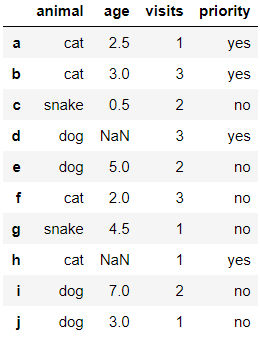

In [25]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a','b','c','d','e','f','g','h','i','j']
df2 = pd.DataFrame(data,index=labels)
df2

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


22、查看 DataFrame 的数据类型

In [26]:
df2.dtypes

animal       object
age         float64
visits        int64
priority     object
dtype: object

23、预览 DataFrame 的前 5 行数据

In [27]:
df2.head()

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no


24、查看 DataFrame 的后 3 行数据

In [28]:
df2.tail(3)

,animal,age,visits,priority
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


25、查看 DataFrame 的索引

In [29]:
df2.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

26、 查看 DataFrame 的列名

In [30]:
df2.columns

Index(['animal', 'age', 'visits', 'priority'], dtype='object')

27、查看 DataFrame 的数值

In [31]:
df2.values

array([['cat', 2.5, 1, 'yes'],
       ['cat', 3.0, 3, 'yes'],
       ['snake', 0.5, 2, 'no'],
       ['dog', nan, 3, 'yes'],
       ['dog', 5.0, 2, 'no'],
       ['cat', 2.0, 3, 'no'],
       ['snake', 4.5, 1, 'no'],
       ['cat', nan, 1, 'yes'],
       ['dog', 7.0, 2, 'no'],
       ['dog', 3.0, 1, 'no']], dtype=object)

28、查看 DataFrame 的统计数据

In [32]:
df2.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


29、DataFrame 转置操作

In [33]:
df2.transpose()

,a,b,c,d,e,f,g,h,i,j
animal,cat,cat,snake,dog,dog,cat,snake,cat,dog,dog
age,2.5,3,0.5,NaN,5,2,4.5,NaN,7,3
visits,1,3,2,3,2,3,1,1,2,1
priority,yes,yes,no,yes,no,no,no,yes,no,no


30、对 DataFrame 进行按列排序

In [34]:
df3 = df2.sort_values(by = 'age')

In [35]:
df3.set_index([['a','b','c','d','e','f','g','h','i','j']])

,animal,age,visits,priority
a,snake,0.5,2,no
b,cat,2.0,3,no
c,cat,2.5,1,yes
d,cat,3.0,3,yes
e,dog,3.0,1,no
f,snake,4.5,1,no
g,dog,5.0,2,no
h,dog,7.0,2,no
i,dog,NaN,3,yes
j,cat,NaN,1,yes


31、对 DataFrame 数据切片,第1、2行

In [36]:
df2[1:3]

,animal,age,visits,priority
b,cat,3.0,3,yes
c,snake,0.5,2,no


32、对 DataFrame 通过标签查询（单列age）

In [37]:
df2['age'] , df2.age

(a    2.5
 b    3.0
 c    0.5
 d    NaN
 e    5.0
 f    2.0
 g    4.5
 h    NaN
 i    7.0
 j    3.0
 Name: age, dtype: float64, a    2.5
 b    3.0
 c    0.5
 d    NaN
 e    5.0
 f    2.0
 g    4.5
 h    NaN
 i    7.0
 j    3.0
 Name: age, dtype: float64)

33、对 DataFrame 通过标签查询（多列age,animal）

In [38]:
df2[['age','animal']]

,age,animal
a,2.5,cat
b,3.0,cat
c,0.5,snake
d,NaN,dog
e,5.0,dog
f,2.0,cat
g,4.5,snake
h,NaN,cat
i,7.0,dog
j,3.0,dog


34、对 DataFrame 通过位置查询，第1、2行

In [39]:
df2.iloc[1:3]

,animal,age,visits,priority
b,cat,3.0,3,yes
c,snake,0.5,2,no


35、DataFrame 副本拷贝

In [ ]:
#生成 DataFrame 副本，方便数据集被多个不同流程使用

In [40]:
df3 = df2.copy()
df3

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


36、判断 DataFrame 元素是否为空

In [41]:
df2.isnull().any()

animal      False
age          True
visits      False
priority    False
dtype: bool

37、添加列数据，列名No.，数据[0,1,2,3,4,5,6,7,8,9]

In [42]:
num  = pd.Series([0,1,2,3,4,5,6,7,8,9],index=df3.index)

df3['No. '] = num
df3

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,cat,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,2.0,3,no,5
g,snake,4.5,1,no,6
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


38、根据 DataFrame 的下标值进行更改

In [ ]:
# 修改第 2 行与第 1 列对应的值 3.0 → 2.0

In [43]:
df3.iloc[1,0] = 2
df3

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,2.0,3,no,5
g,snake,4.5,1,no,6
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


39、根据 DataFrame 的标签对数据进行修改，索引f列名age修改为1.5

In [44]:
df3.loc['f','age'] = 1.5
df3

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
g,snake,4.5,1,no,6
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


40、DataFrame 求平均值操作

In [45]:
df3.mean()

age       3.375
visits    1.900
No.       4.500
dtype: float64

41、对 DataFrame 中任意列做求和操作

In [46]:
df3.visits.sum()

19

### 字符串操作

42、将字符串['A', 'B', 'C', 'Aaba', 'Baca',np.nan, 'CABA', 'dog', 'cat']转化为小写字母

In [47]:
string = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca',
                    np.nan, 'CABA', 'dog', 'cat'])
print(string)
string.str.lower()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

43、将字符串转化为大写字母

In [48]:
string.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

### DataFrame 缺失值操作

44、对缺失值进行填充

In [49]:
df4 = df3.copy()
print(df4)
df4.fillna(3)

  animal  age  visits priority  No. 
a    cat  2.5       1      yes     0
b      2  3.0       3      yes     1
c  snake  0.5       2       no     2
d    dog  NaN       3      yes     3
e    dog  5.0       2       no     4
f    cat  1.5       3       no     5
g  snake  4.5       1       no     6
h    cat  NaN       1      yes     7
i    dog  7.0       2       no     8
j    dog  3.0       1       no     9


,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,3.0,3,yes,3
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
g,snake,4.5,1,no,6
h,cat,3.0,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


45、删除存在缺失值的行

In [50]:
df5 = df3.copy()
print(df5)
df5.dropna(how='any')

  animal  age  visits priority  No. 
a    cat  2.5       1      yes     0
b      2  3.0       3      yes     1
c  snake  0.5       2       no     2
d    dog  NaN       3      yes     3
e    dog  5.0       2       no     4
f    cat  1.5       3       no     5
g  snake  4.5       1       no     6
h    cat  NaN       1      yes     7
i    dog  7.0       2       no     8
j    dog  3.0       1       no     9


,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
g,snake,4.5,1,no,6
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


46、DataFrame 按指定列对齐

In [51]:
left = pd.DataFrame({'key': ['foo1', 'foo2'], 'one': [1, 2]})
right = pd.DataFrame({'key': ['foo2', 'foo3'], 'two': [4, 5]})

print(left)
print(right)

# 按照 key 列对齐连接，只存在 foo2 相同，所以最后变成一行

    key  one
0  foo1    1
1  foo2    2
    key  two
0  foo2    4
1  foo3    5


In [52]:
pd.merge(left,right,on="key")

,key,one,two
0,foo2,2,4


### DataFrame 文件操作

47、CSV 文件写入

In [53]:
df3.to_csv('animal.csv')

48、CSV 文件读取

In [54]:
df_animal = pd.read_csv('animal.csv')
df_animal

,Unnamed: 0,animal,age,visits,priority,No.
0,a,cat,2.5,1,yes,0
1,b,2,3.0,3,yes,1
2,c,snake,0.5,2,no,2
3,d,dog,NaN,3,yes,3
4,e,dog,5.0,2,no,4
5,f,cat,1.5,3,no,5
6,g,snake,4.5,1,no,6
7,h,cat,NaN,1,yes,7
8,i,dog,7.0,2,no,8
9,j,dog,3.0,1,no,9


49、Excel 写入操作

In [55]:
df3.to_excel('animal.xlsx',sheet_name="Sheet1")
print('写入成功')

写入成功


50、Excel 读取操作

In [56]:
pd.read_excel('animal.xlsx','Sheet1',index_col=None)

,Unnamed: 0,animal,age,visits,priority,No.
0,a,cat,2.5,1,yes,0
1,b,2,3.0,3,yes,1
2,c,snake,0.5,2,no,2
3,d,dog,NaN,3,yes,3
4,e,dog,5.0,2,no,4
5,f,cat,1.5,3,no,5
6,g,snake,4.5,1,no,6
7,h,cat,NaN,1,yes,7
8,i,dog,7.0,2,no,8
9,j,dog,3.0,1,no,9


## 进阶部分

### 时间序列索引

51、建立一个以 2018 年每一天为索引，值为随机数的 Series

In [57]:
dti = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')
s = pd.Series(np.random.rand(len(dti)), index=dti)
s

2018-01-01    0.209602
2018-01-02    0.396295
2018-01-03    0.451959
2018-01-04    0.437910
2018-01-05    0.114101
2018-01-06    0.741914
2018-01-07    0.196632
2018-01-08    0.112072
2018-01-09    0.753707
2018-01-10    0.189395
2018-01-11    0.478832
2018-01-12    0.397799
2018-01-13    0.884848
2018-01-14    0.484649
2018-01-15    0.244684
2018-01-16    0.295822
2018-01-17    0.478914
2018-01-18    0.855852
2018-01-19    0.604668
2018-01-20    0.727403
2018-01-21    0.095839
2018-01-22    0.960587
2018-01-23    0.604245
2018-01-24    0.775556
2018-01-25    0.489377
2018-01-26    0.099501
2018-01-27    0.293935
2018-01-28    0.074787
2018-01-29    0.721074
2018-01-30    0.891998
                ...   
2018-12-02    0.216033
2018-12-03    0.202324
2018-12-04    0.482438
2018-12-05    0.182558
2018-12-06    0.017284
2018-12-07    0.690084
2018-12-08    0.291757
2018-12-09    0.925937
2018-12-10    0.991920
2018-12-11    0.279866
2018-12-12    0.091909
2018-12-13    0.992339
2018-12-14 

52、统计`s` 中每一个周三对应值的和

In [58]:
s[s.index.weekday==2].sum()

22.778879420129588

53、 统计`s`中每个月值的平均值

In [59]:
s.resample('M').mean()

2018-01-31    0.463125
2018-02-28    0.476946
2018-03-31    0.410042
2018-04-30    0.538184
2018-05-31    0.497034
2018-06-30    0.444995
2018-07-31    0.513726
2018-08-31    0.477788
2018-09-30    0.534404
2018-10-31    0.491611
2018-11-30    0.503999
2018-12-31    0.445989
Freq: M, dtype: float64

55、UTC 世界时间标准

In [60]:
s = pd.date_range('today', periods=1, freq='D') # 获取当前时间
ts = pd.Series(np.random.randn(len(s)),s) # 随机数组
ts_utc = ts.tz_localize('UTC') # 转换为UTC时间
ts_utc

2021-02-07 12:16:35.435942+00:00   -0.77588
Freq: D, dtype: float64

In [61]:
ts

2021-02-07 12:16:35.435942   -0.77588
Freq: D, dtype: float64

56、转换为上海所在时区

In [ ]:
#看一看你当前的时间，是不是一致？

In [62]:
ts_utc.tz_convert('Asia/Shanghai')

2021-02-07 20:16:35.435942+08:00   -0.77588
Freq: D, dtype: float64

57、不同时间表示方式的转换

In [63]:
time = pd.date_range('1/1/2019',periods=5,freq='M')
ts = pd.Series(np.random.randn(len(time)),index=time)
print(ts)
ps = ts.to_period()
print(ps)
ps.to_timestamp()

2019-01-31    0.125174
2019-02-28   -0.061156
2019-03-31   -1.089587
2019-04-30   -1.620452
2019-05-31    1.190980
Freq: M, dtype: float64
2019-01    0.125174
2019-02   -0.061156
2019-03   -1.089587
2019-04   -1.620452
2019-05    1.190980
Freq: M, dtype: float64


2019-01-01    0.125174
2019-02-01   -0.061156
2019-03-01   -1.089587
2019-04-01   -1.620452
2019-05-01    1.190980
Freq: MS, dtype: float64

### DataFrame操作

58、DataFrame 条件查找

In [64]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)

In [65]:
# 查找 `age` 大于 `3` 的全部信息
df[df['age']>3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


59、根据行列索引切片

In [66]:
df.iloc[2:4,1:3]

,age,visits
c,0.5,2
d,NaN,3


60、DataFrame 多重条件查询

查找 `age<3` 且为 `cat` 的全部数据。

In [70]:
df[(df['animal']=="cat" )& (df['age']<3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


61、DataFrame 按关键字查询,查询animal列中为cat、dog的数

In [71]:
df[df['animal'].isin(['cat','dog'])]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


62、DataFrame 按标签[3,4,8]及列名animal、age查询。

In [72]:
df.loc[df.index[[3,4,8]],['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


63、DataFrame 多条件排序

按照 `age` 降序，`visits` 升序排列

In [73]:
df.sort_values(by = ['age','visits'],ascending=[False,True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


64、DataFrame 多值替换

In [ ]:
# 将 `priority` 列的 `yes` 值替换为 `True`，`no` 值替换为 `False`。

In [74]:
df['priority'].map({'yes':True,'no':False})

a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

65、DataFrame 按animal分组求和

In [75]:
df.groupby('animal').sum()

,age,visits
animal,,
cat,7.5,8
dog,15.0,8
snake,5.0,3


66、使用列表拼接多个 DataFrame

In [76]:
temp_df1 = pd.DataFrame(np.random.randn(5, 4))  # 生成由随机数组成的 DataFrame 1
temp_df2 = pd.DataFrame(np.random.randn(5, 4))  # 生成由随机数组成的 DataFrame 2
temp_df3 = pd.DataFrame(np.random.randn(5, 4))  # 生成由随机数组成的 DataFrame 3

print(temp_df1)
print(temp_df2)
print(temp_df3)

          0         1         2         3
0 -0.442689 -1.819559  0.344688 -0.901895
1  0.560632  2.565109  0.776196  0.262984
2  0.000685 -1.111872  1.474077 -0.078958
3  0.254863  1.908120  0.468357  1.450725
4  0.343123 -0.511705 -0.752003  0.492574
          0         1         2         3
0 -2.170020  0.999115 -0.088083  0.103577
1  0.955994 -0.819758  0.452229  0.223794
2 -1.607410  0.108720  0.912304  0.133229
3 -0.153463  0.207591  0.564637 -0.110133
4 -1.190554 -0.524783  1.385146 -0.905498
          0         1         2         3
0  0.167360 -0.517343 -1.985275  0.899309
1 -1.090193  1.025842 -0.575540  0.937530
2 -0.878507  0.006563 -0.763986 -0.411100
3 -0.441699  0.014426 -1.056039 -1.200948
4  0.447473  0.651050  0.394751  0.775399


In [77]:
pd.concat([temp_df1,temp_df2,temp_df3])

,0,1,2,3
0,-0.442689,-1.819559,0.344688,-0.901895
1,0.560632,2.565109,0.776196,0.262984
2,0.000685,-1.111872,1.474077,-0.078958
3,0.254863,1.908120,0.468357,1.450725
4,0.343123,-0.511705,-0.752003,0.492574
0,-2.170020,0.999115,-0.088083,0.103577
1,0.955994,-0.819758,0.452229,0.223794
2,-1.607410,0.108720,0.912304,0.133229
3,-0.153463,0.207591,0.564637,-0.110133
4,-1.190554,-0.524783,1.385146,-0.905498


67、找出 DataFrame 表中和最小的列

In [78]:
df = pd.DataFrame(np.random.random(size=(5,10)),columns=list('abcdefghij'))
print(df)
df.sum().idxmax()

          a         b         c         d         e         f         g  \
0  0.256871  0.846309  0.360313  0.274655  0.082791  0.191802  0.583537   
1  0.666742  0.983816  0.787971  0.147654  0.766598  0.263246  0.413057   
2  0.075074  0.564530  0.213991  0.929309  0.158282  0.614072  0.595295   
3  0.720058  0.942926  0.144806  0.147230  0.572620  0.712510  0.804693   
4  0.447177  0.519639  0.336874  0.130109  0.838075  0.165347  0.521325   

          h         i         j  
0  0.212306  0.990233  0.449151  
1  0.196422  0.292784  0.783296  
2  0.504088  0.985900  0.863222  
3  0.965315  0.864241  0.509491  
4  0.716337  0.935601  0.469937  


'i'

68、DataFrame 中每个元素减去每一行的平均值

In [79]:
df  = pd.DataFrame(np.random.random(size=(5,3)))
print(df)
df.sub(df.mean(axis=1),axis=0)

          0         1         2
0  0.657272  0.990794  0.830421
1  0.285373  0.364774  0.515986
2  0.643246  0.572573  0.168885
3  0.860251  0.725122  0.482311
4  0.356211  0.109890  0.304816


,0,1,2
0,-0.168890,0.164632,0.004259
1,-0.103338,-0.023937,0.127275
2,0.181678,0.111005,-0.292683
3,0.171023,0.035894,-0.206917
4,0.099239,-0.147082,0.047844


69、DataFrame 分组，并得到每一组中最大三个数之和

In [80]:
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'),
                   'B': [12, 345, 3, 1, 45, 14, 4, 52, 54, 23, 235, 21, 57, 3, 87]})
print(df)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87


In [81]:
df.groupby('A')['B'].nlargest(3).sum(level=0)

A
a    409
b    156
c    345
Name: B, dtype: int64

 ### 透视表 

70、透视表的创建

新建表将 `A, B, C` 列作为索引进行聚合。

In [82]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [83]:
df.pivot_table(df,index=['A','B'])

D         E
A     B                    
one   A -0.416471  0.969353
      B  0.788858 -0.711225
      C  0.506057  0.578084
three A -0.902374  0.805122
      B  1.546515  0.839401
      C  0.830345  0.430954
two   A  1.086374 -0.012978
      B -2.732256  1.018959
      C  0.148280  1.629467

71、透视表按指定行进行聚合

该 DataFrame 的 `D` 列聚合，按照 `A,B` 列为索引进行聚合，聚合的方式为默认求均值。

In [84]:
df.pivot_table(values = ['D'], index = ['A','B'])

D
A     B          
one   A -0.416471
      B  0.788858
      C  0.506057
three A -0.902374
      B  1.546515
      C  0.830345
two   A  1.086374
      B -2.732256
      C  0.148280

72、透视表聚合方式定义

上一题中聚合时，采用默认求均值的方法，若想使用更多的方式可以在 `aggfunc` 中实现。

In [85]:
df.pivot_table(values = ['D'], index = ['A','B'],aggfunc=[np.sum,np.max])

sum      amax
                D         D
A     B                    
one   A -0.832942 -0.198004
      B  1.577716  1.018571
      C  1.012113  1.745423
three A -0.902374 -0.902374
      B  1.546515  1.546515
      C  0.830345  0.830345
two   A  1.086374  1.086374
      B -2.732256 -2.732256
      C  0.148280  0.148280

73、透视表利用额外列进行辅助分割

`D` 列按照 `A,B` 列进行聚合时，若关心 `C` 列对 `D` 列的影响，可以加入 `columns` 值进行分析。

In [86]:
pd.pivot_table(df,values=['D'],index=['A','B'], columns=['C'], aggfunc=np.sum)

D          
C             bar       foo
A     B                    
one   A -0.634938 -0.198004
      B  0.559145  1.018571
      C -0.733310  1.745423
three A -0.902374       NaN
      B       NaN  1.546515
      C  0.830345       NaN
two   A       NaN  1.086374
      B -2.732256       NaN
      C       NaN  0.148280

74、透视表的缺省值处理

在透视表中由于不同的聚合方式，相应缺少的组合将为缺省值，可以加入 `fill_value` 对缺省值处理。

In [87]:
pd.pivot_table(df, values=['D'], index=['A', 'B'],
               columns=['C'], aggfunc=np.sum, fill_value=0)

D          
C             bar       foo
A     B                    
one   A -0.634938 -0.198004
      B  0.559145  1.018571
      C -0.733310  1.745423
three A -0.902374  0.000000
      B  0.000000  1.546515
      C  0.830345  0.000000
two   A  0.000000  1.086374
      B -2.732256  0.000000
      C  0.000000  0.148280

### 其他

75、你有一个由10列浮点数组成的DataFrame。假设每一行恰好有5个元素是NaN值。对于DataFrame的每一行，找到包含第三个 NaN值的列。 (你应该返回一系列列标签。)

In [88]:
df = pd.DataFrame([[2.0,np.nan,1.0,3.0,np.nan,5.0,np.nan,np.nan,np.nan,6.0],
                   [3.0,4.0,np.nan,np.nan,5.0,np.nan,5.0,7.0,np.nan,np.nan],
                   [3.0,np.nan,4.0,np.nan,5.0,np.nan,np.nan,5.0,np.nan,6.0],
                   [1.0,np.nan,0.0,np.nan,6.0,np.nan,5.0,8.0,np.nan,np.nan]])
df

,0,1,2,3,4,5,6,7,8,9
0,2.0,NaN,1.0,3.0,NaN,5.0,NaN,NaN,NaN,6.0
1,3.0,4.0,NaN,NaN,5.0,NaN,5.0,7.0,NaN,NaN
2,3.0,NaN,4.0,NaN,5.0,NaN,NaN,5.0,NaN,6.0
3,1.0,NaN,0.0,NaN,6.0,NaN,5.0,8.0,NaN,NaN


In [89]:
(df.isnull().cumsum(axis=1)==3).idxmax(axis=1)

0    6
1    5
2    5
3    5
dtype: int64

76、DataFrame有两个整数列'A'和'B'。“A”中的值在1到100(含)之间。对于“A”中的每组有10个连续整数(即'(0,10] '， '(10,20) '，…)，计算列'B'中相应值的和。

In [90]:
df = pd.DataFrame({'A':np.arange(1,101),
                  'B':np.arange(100,200)})
df.head()

,A,B
0,1,100
1,2,101
2,3,102
3,4,103
4,5,104


In [91]:
df.groupby(pd.cut(df['A'],np.arange(0,101,10)))['B'].sum()

A
(0, 10]      1045
(10, 20]     1145
(20, 30]     1245
(30, 40]     1345
(40, 50]     1445
(50, 60]     1545
(60, 70]     1645
(70, 80]     1745
(80, 90]     1845
(90, 100]    1945
Name: B, dtype: int32